# Challenge:
The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017.


# Importar librerias y cargar el dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# Cargar datos del .csv
original_data = pd.read_csv("dataset_SCL.csv",
                parse_dates=['Fecha-I', 'Fecha-O'],
                dtype = {                
                'Vlo-I': 'string',
                'Ori-I' : 'string' ,
                'Des-I' : 'string' ,
                'Emp-I': 'string',
                'Vlo-O': 'string',
                'Ori-O': 'string', 
                'Des-O': 'string',
                'Emp-O': 'string', 
                'DIA': 'int64', 
                'MES': 'int64', 
                'AÑO': 'int64', 
                'DIANOM': 'string', 
                'TIPOVUELO': 'string',
                'OPERA': 'string', 
                'SIGLAORI': 'string', 
                'SIGLADES': 'string'
                }
                )
original_data.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


- Fecha-I: Scheduled date and time of the flight.
- Vlo-I : Scheduled flight number.
- Ori-I : Programmed origin city code.
- Des-I : Programmed destination city code.
- Emp-I : Scheduled flight airline code.
- Fecha-O : Date and time of flight operation.
- Vlo-O : Flight operation number of the flight.
- Ori-O : Operation origin city code
- Des-O : Operation destination city code.
- Emp-O : Airline code of the operated flight.
- DIA: Day of the month of flight operation.
- MES : Number of the month of operation of the flight.
- AÑO : Year of flight operation.
- DIANOM : Day of the week of flight operation.
- TIPOVUELO : Type of flight, I =International, N =National.
- OPERA : Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.

# Procesamiento de datos: Verificación de nulos y consistencia en el formato de variables

In [3]:
#Cantidad total de filas
print(f"Cantidad de filas totales: {len(original_data)}")

#Revisar cantidad de nulos por columna
print(f"Cantidad de valores nulos por columna: {original_data.isna().sum()}")

#Existe solo 1 fila con un valor nulo, debido a que es solo una no hay problema si se elimina

not_null_data = original_data.dropna().copy()

print(f"Cantidad de filas totales del dataframe filtrado: {len(not_null_data)}")
print(f"Cantidad de filas nulas en dataframe filtrado: {not_null_data.isna().sum().sum()}")

Cantidad de filas totales: 68206
Cantidad de valores nulos por columna: Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
Cantidad de filas totales del dataframe filtrado: 68205
Cantidad de filas nulas en dataframe filtrado: 0


## Valores únicos por columna:
- Se puede observar que la tanto Vlo-I, DES-I y EMP-I no tienen la misma cantidad de valores únicos que sus contrapartes de operación, hay que revisar si esto se debe a irregularidades de formato en dichas variables

In [4]:
#Cantidad de valores únicos por columna 
print("Cantidad de valores únicos por columna")
not_null_data.nunique(axis=0)

Cantidad de valores únicos por columna


Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

## Código de vuelo: 
- Existen 584 vuelos únicos en el campo de vuelos programados, mientras que en vuelos operados tenemos 861 valores únicos.
- Mirando algunos casos nos podemos dar cuenta que hay ID de vuelos en formato "float", como por ejemplo '1.0' o '10.0'. Asumiré que estos vuelos son lo mismo que 1 o 10, aplicaré una función para normalizar dichos valores en enteros.

In [5]:
#Vuelos programados únicos
print(f"ID unicos de los vuelos programados:  {not_null_data['Vlo-I'].sort_values().values.unique()}")

#Vuelos operados únicos
print(f"ID unicos de los vuelos realizados: {not_null_data['Vlo-O'].sort_values().values.unique()}")


ID unicos de los vuelos programados:  <StringArray>
[   '1',   '10',  '100', '1003', '1004', '1005', '1011',  '102', '1025',
 '1031',
 ...
   '98', '9851',  '986',  '988', '989P',   '99',  '991',  '993', '9955',
 '9956']
Length: 584, dtype: string
ID unicos de los vuelos realizados: <StringArray>
[   '1',  '1.0',   '10', '10.0',  '100', '1001', '1003', '1004', '1005',
 '1011',
 ...
  '986', '9860',  '988',  '989',   '99', '99.0',  '991',  '993', '9955',
 '9956']
Length: 861, dtype: string


In [6]:
#Transformación de valores ingresados como float a int.

not_null_data['Vlo-I'] = not_null_data['Vlo-I'].str.split('.').str[0].values
not_null_data['Vlo-O'] = not_null_data['Vlo-O'].str.split('.').str[0].values

print(f'''Valores únicos en Vlo-I: {not_null_data['Vlo-I'].nunique()}''')
print(f'''Valores únicos en Vlo-O: {not_null_data['Vlo-O'].nunique()}''')
print("\n Para el caso de Vlo-O habian 253 casos de valores enteros ingresados como floats, mientras que en Vlo-I ninguno.")

Valores únicos en Vlo-I: 584
Valores únicos en Vlo-O: 608

 Para el caso de Vlo-O habian 253 casos de valores enteros ingresados como floats, mientras que en Vlo-I ninguno.


## Código de destino

- Existen 64 destinos únicos programados mientras que en operacion hay 63, no se observa algún problema ya que pareciera estar todo en el mismo formato.

In [7]:
print(f"ID unicos de destinos programados:  {not_null_data['Des-I'].sort_values().values.unique()}")

print(f"ID unicos de destinos realizados: {not_null_data['Des-O'].sort_values().values.unique()}")

ID unicos de destinos programados:  <StringArray>
['CYYZ', 'EGLL', 'EGYP', 'KATL', 'KDFW', 'KIAH', 'KJFK', 'KLAX', 'KMCO',
 'KMIA', 'LEMD', 'LFPG', 'LIRF', 'MDPC', 'MMMX', 'MMUN', 'MPTO', 'NZAA',
 'SAAR', 'SABE', 'SACO', 'SAEZ', 'SAME', 'SANT', 'SANU', 'SARI', 'SAWH',
 'SAZN', 'SAZS', 'SBCT', 'SBFI', 'SBFL', 'SBGL', 'SBGR', 'SCAR', 'SCAT',
 'SCBA', 'SCCF', 'SCCI', 'SCDA', 'SCFA', 'SCIE', 'SCIP', 'SCJO', 'SCNT',
 'SCPQ', 'SCQP', 'SCSE', 'SCTE', 'SCVD', 'SEGU', 'SEQM', 'SEQU', 'SGAS',
 'SKBO', 'SLCB', 'SLLP', 'SLVR', 'SPJC', 'SPSO', 'SULS', 'SUMU', 'YMML',
 'YSSY']
Length: 64, dtype: string
ID unicos de destinos realizados: <StringArray>
['CYYZ', 'EGLL', 'EGYP', 'KATL', 'KDFW', 'KIAD', 'KIAH', 'KJFK', 'KLAX',
 'KMCO', 'KMIA', 'LEMD', 'LFPG', 'LIRF', 'MDPC', 'MMMX', 'MMUN', 'MPTO',
 'NZAA', 'SAAR', 'SABE', 'SACO', 'SAEZ', 'SAME', 'SANT', 'SANU', 'SAWH',
 'SAZN', 'SAZS', 'SBCT', 'SBFI', 'SBFL', 'SBGL', 'SBGR', 'SCAR', 'SCAT',
 'SCBA', 'SCCF', 'SCCI', 'SCDA', 'SCFA', 'SCIE', 'SCIP', 'SCJO',

## Código de aerolinea:
- Existen 30 aerolineas distintas en el campo de programadas mientras que en las de operacion 32, revisando nos damos cuenta que efectivamente hay aerolineas que no estan en ambas listas, de todas formas siguen el mismo formato de 3 caracteres por lo que asumire que esto está bien.

In [8]:
print(f"ID unicos de los vuelos programados:  {not_null_data['Emp-I'].sort_values().values.unique()}")

print(f"ID unicos de los vuelos realizados: {not_null_data['Emp-O'].sort_values().values.unique()}")

ID unicos de los vuelos programados:  <StringArray>
['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW', 'CMP', 'DAL',
 'DSM', 'GLO', 'IBE', 'JAT', 'JMR', 'KLM', 'LAN', 'LAP', 'LAW', 'LNE', 'LPE',
 'LRC', 'LXP', 'ONE', 'PUE', 'QFU', 'SKU', 'TAM', 'UAL']
Length: 30, dtype: string
ID unicos de los vuelos realizados: <StringArray>
['48O', '56R', 'AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
 'CMP', 'DAL', 'DSM', 'GLO', 'IBE', 'JAT', 'JMR', 'KLM', 'LAN', 'LAP', 'LNE',
 'LPE', 'LRC', 'LXP', 'ONE', 'PUE', 'QFA', 'SKU', 'TAM', 'TPU', 'UAL']
Length: 32, dtype: string


## Revisión del resto de variables: Observando los valores únicos en cada variable no se encontró ninguna irregularidad.
- DIA: ok
- MES: ok
- AÑO: ok
- DIANOM: ok
- TIPOVUELO: ok
- OPERA: ok
- SIGLAORI: ok, todos los vuelos salen de Santiago
- SIGLADES: ok

In [9]:
print(f"""\nValores únicos para día: \n {not_null_data["DIA"].sort_values().unique()}""")
print(f"""\nValores únicos para mes: \n {not_null_data["MES"].sort_values().unique()}""")
print(f"""\nValores únicos para año: \n {not_null_data["AÑO"].sort_values().unique()}""")
print(f"""\nValores únicos para día nominal: \n {not_null_data["DIANOM"].sort_values().unique()}""")
print(f"""\nValores únicos para tipo vuelo: \n {not_null_data["TIPOVUELO"].sort_values().unique()}""")
print(f"""\nValores únicos aerolinea: \n {not_null_data["OPERA"].sort_values().unique()}""")
print(f"""\nValores únicos origen: \n {not_null_data["SIGLAORI"].sort_values().unique()}""")
print(f"""\nValores únicos destino: \n {not_null_data["SIGLADES"].sort_values().unique()}""")


Valores únicos para día: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

Valores únicos para mes: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]

Valores únicos para año: 
 [2017 2018]

Valores únicos para día nominal: 
 <StringArray>
['Domingo', 'Jueves', 'Lunes', 'Martes', 'Miercoles', 'Sabado', 'Viernes']
Length: 7, dtype: string

Valores únicos para tipo vuelo: 
 <StringArray>
['I', 'N']
Length: 2, dtype: string

Valores únicos aerolinea: 
 <StringArray>
[   'Aerolineas Argentinas',               'Aeromexico',
               'Air Canada',               'Air France',
                 'Alitalia',        'American Airlines',
                  'Austral',                  'Avianca',
          'British Airways',                 'Copa Air',
                'Delta Air',                'Gol Trans',
              'Grupo LATAM',                   'Iberia',
             'JetSmart SPA',                   'K.L.M.',
                    'Lacsa',     'La

# Cantidad de aerolineas por empresa:

In [10]:
# Duplas operador - aerolinea
cols = ['OPERA', 'Emp-I']
not_null_data[cols].value_counts().reset_index().sort_values(by = 'OPERA')

,OPERA,Emp-I,0
3,Aerolineas Argentinas,ARG,1949
14,Aeromexico,AMX,351
10,Air Canada,ACA,565
12,Air France,AFR,358
17,Alitalia,AZA,259
9,American Airlines,AAL,757
24,Austral,AUT,74
6,Avianca,AVA,1152
20,British Airways,BAW,205
4,Copa Air,CMP,1850


# 1.- Algunos insights preliminares: How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?
- El dataset solo contiene vuelos que salen de Santiago.

- Los datos no presentan mucha suciedad, solo se encontró un nulo. En cuanto a inconsistencia solo se encontró que algunos vuelos estaban en formato float, pero fueron transformados a enteros sin problemas.

- Un operador puede tener varias aerolineas como se ve con grupo LATAM, esto es util pues ahora es claro que entre las variables OPERA y Emp-I tenemos la misma información, solo que en Emp-I tenemos más granularidad, pero al costo de aumentar la dimensionalidad de las variables predictivas una vez se realice one hot encoding, por lo tanto es recomendable solo utilizar la variable OPERA.

- Como se muestra en la siguiente celda, podemos encontrar una cantidad considerable de vuelos donde la aerolinea programada no fue la utilizada finalmente, esta información podría ser indicio de días con mayor "congestión" producto de reagendamientos.

- De la misma forma hay una cantidad muy pequeña de vuelos donde el destino programado no fue el mismo que el final o que el mismo vuelo programado no fue el final, debido a que son muy pocos casos voy a optar por eliminarlos del estudio pues son anomalos y es posible que estos datos sean erroneos.

In [11]:
print(f'''Cantidad de vuelos totales: {len(not_null_data)}''')
print(f'''Cantidad de vuelos donde la empresa programada no fue la misma que la operadora: {len(not_null_data[not_null_data['Emp-I'] != not_null_data['Emp-O']])} ''')
print(f'''Cantidad de vuelos donde el destino programado no fue el mismo que el final: {len(not_null_data[not_null_data['Des-I'] != not_null_data['Des-O']])} ''')
print(f'''Cantidad de vuelos donde el programado no fue el mismo que el final: {len(not_null_data[not_null_data['Vlo-I'] != not_null_data['Vlo-O']])} ''')

#Filtrar los casos anomalos mencionados
not_null_data = not_null_data[(not_null_data["Des-I"] == not_null_data["Des-O"]) & (not_null_data["Vlo-I"] == not_null_data["Vlo-O"])]

print(f'''Cantidad de vuelos totales luego del filtro: {len(not_null_data)}''')

Cantidad de vuelos totales: 68205
Cantidad de vuelos donde la empresa programada no fue la misma que la operadora: 18668 
Cantidad de vuelos donde el destino programado no fue el mismo que el final: 28 
Cantidad de vuelos donde el programado no fue el mismo que el final: 119 
Cantidad de vuelos totales luego del filtro: 68065


# 2.- Creación de variables solicitadas:
- high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
- min_diff : difference in minutes between Date-O and Date-I .
- delay_15 : 1 if min_diff > 15, 0 if not.
- period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I.


In [12]:
# Funcion que recibe un dataframe y entrega una columna con el valor booleano de temporada alta
def high_season_func(x):
    date = pd.DatetimeIndex([x['Fecha-I']])
    month = date.month[0]
    year = date.year[0]
    
    condition_1 = False
    condition_2 = False
    condition_3 = False


    #   Temporada de verano
    if month in [1,2,3]:
        start = pd.to_datetime(f'{year - 1}-12-15')
        end = pd.to_datetime(f'{year}-03-03')
        condition_1 = start <= date <= end

    if month == 12:
        start = pd.to_datetime(f'{year}-12-15')
        end = pd.to_datetime(f'{year + 1}-03-03')
        condition_1 = start <= date <= end

    #   Temporada de Julio
    if month == 7: 
        start = pd.to_datetime(f'{year}-07-15')
        end = pd.to_datetime(f'{year}-07-31')
        condition_1 = start <= date <= end    
        
    #   Temporada de Septiembre
    if month == 9: 
        start = pd.to_datetime(f'{year}-09-11')
        end = pd.to_datetime(f'{year}-09-30')
        condition_1 = start <= date <= end    

    return int(condition_1 or condition_2 or condition_3)


def period_day_func(x):
    date = pd.DatetimeIndex([x['Fecha-I']])
    hour = date.hour[0]

    #   mañana
    if hour >= 5 and hour < 12:

        return 'morning'
    
    #   tarde
    if hour >= 12 and hour < 19:
        return 'afternoon'
    
    #   noche
    if hour >= 19 or hour < 5:
        return 'night'


In [13]:
# Una vez revisada la integridad de los datos se crea un nuevo dataframe con los datos limpios.
clean_data = not_null_data.copy()

#Creación de variables solicitadas
clean_data['high_season'] = clean_data.apply(high_season_func, axis=1)

clean_data['min_diff'] = (clean_data['Fecha-O'] - clean_data['Fecha-I']).dt.total_seconds()/60

clean_data['delay_15'] =  (clean_data['min_diff']  > 15).astype(int)

clean_data['period_day'] = clean_data.apply(period_day_func, axis=1)

# Subir 
clean_data.to_csv('synthetic_features.csv', index=False)

clean_data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'high_season', 'min_diff', 'delay_15',
       'period_day'],
      dtype='object')

In [14]:
# Cargar datos del .csv
new_data = pd.read_csv("synthetic_features.csv",
                parse_dates=['Fecha-I', 'Fecha-O'],
                dtype = {                
                'Vlo-I': 'string',
                'Ori-I' : 'string' ,
                'Des-I' : 'string' ,
                'Emp-I': 'string',
                'Vlo-O': 'string',
                'Ori-O': 'string', 
                'Des-O': 'string',
                'Emp-O': 'string', 
                'DIA': 'string', 
                'MES': 'string', 
                'AÑO': 'string', 
                'DIANOM': 'string', 
                'TIPOVUELO': 'string',
                'OPERA': 'string', 
                'SIGLAORI': 'string', 
                'SIGLADES': 'string',
                'high_season': 'string', 
                'min_diff': 'float64', 
                'delay_15': 'int64',
                'period_day': 'string'
                }
                )
new_data.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,night


# Análisis exploratorio

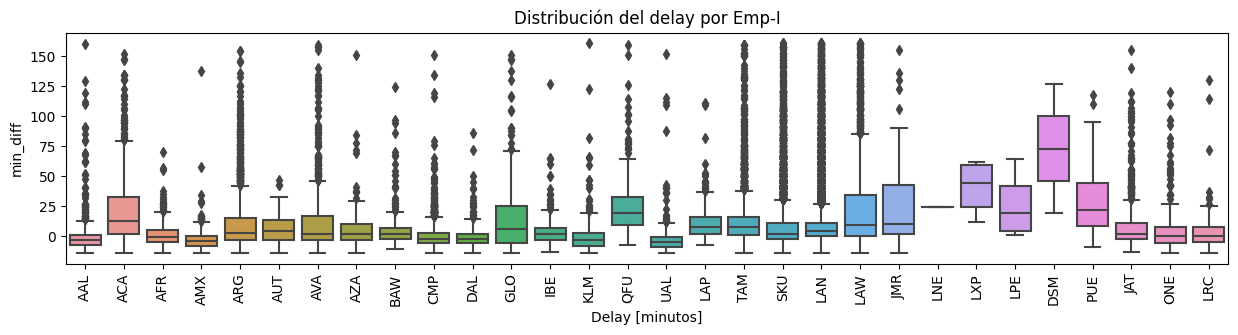

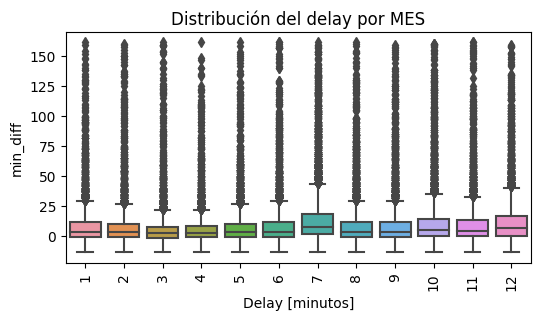

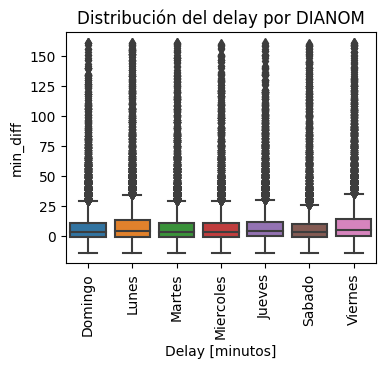

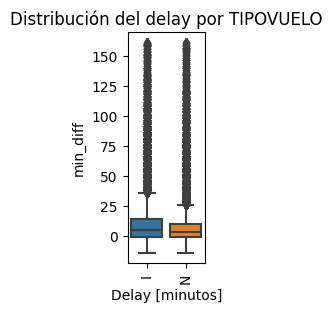

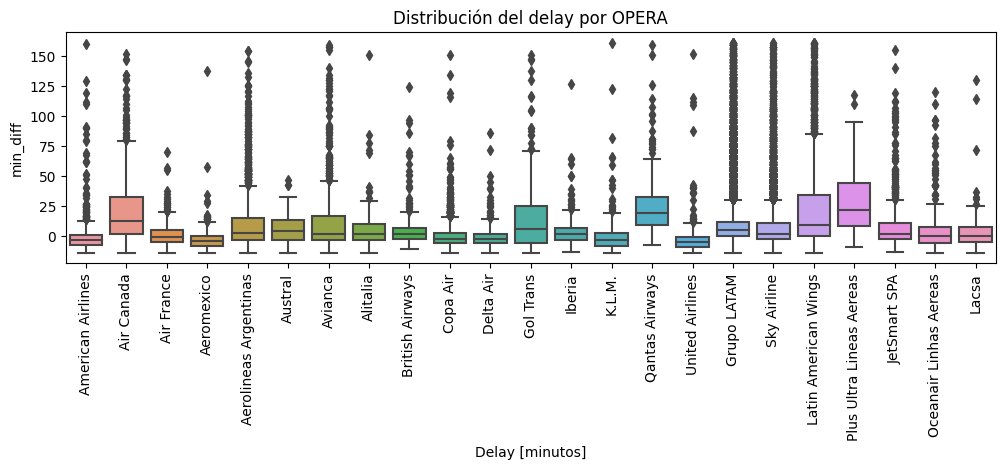

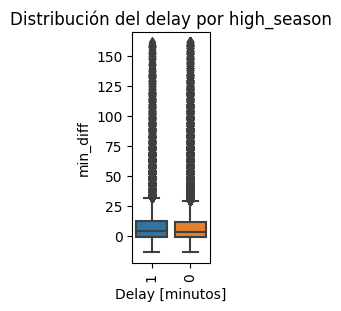

In [15]:
# Barplots del delay sobre posibles variables predictivas

cols = ['Emp-I',  'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season']

for i in cols:
    sub_cols = [i, 'min_diff']
    df = new_data[sub_cols]

    fig, ax = plt.subplots(figsize=( np.ceil((1/2)* df[i].nunique()), 3 ))
    sns.boxplot(data=df, x = i, y="min_diff")
    plt.title(f'''Distribución del delay por {i}''')
    plt.xlabel(f'''Delay [minutos]''')
    plt.xticks(rotation=90)
    plt.show()

## 3.- What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

- Insights pendientes

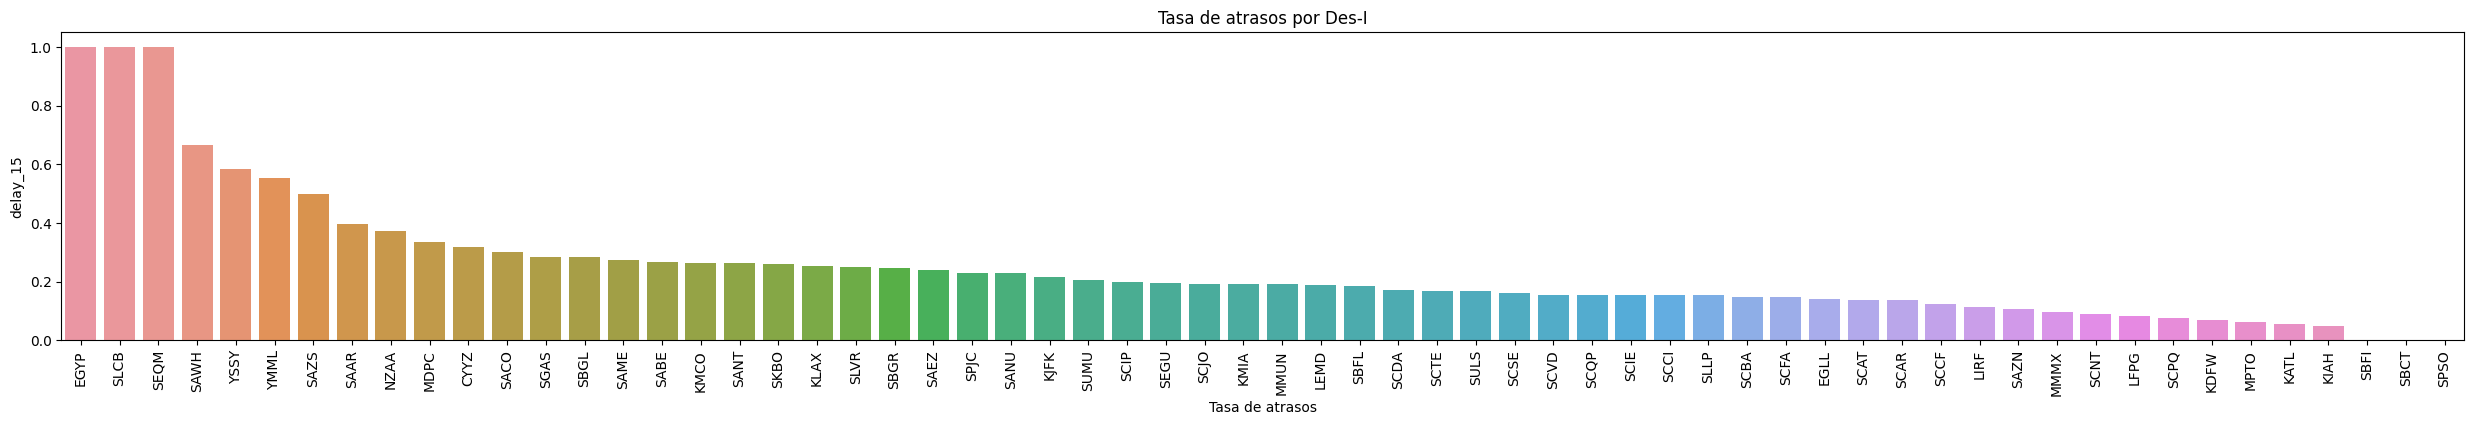

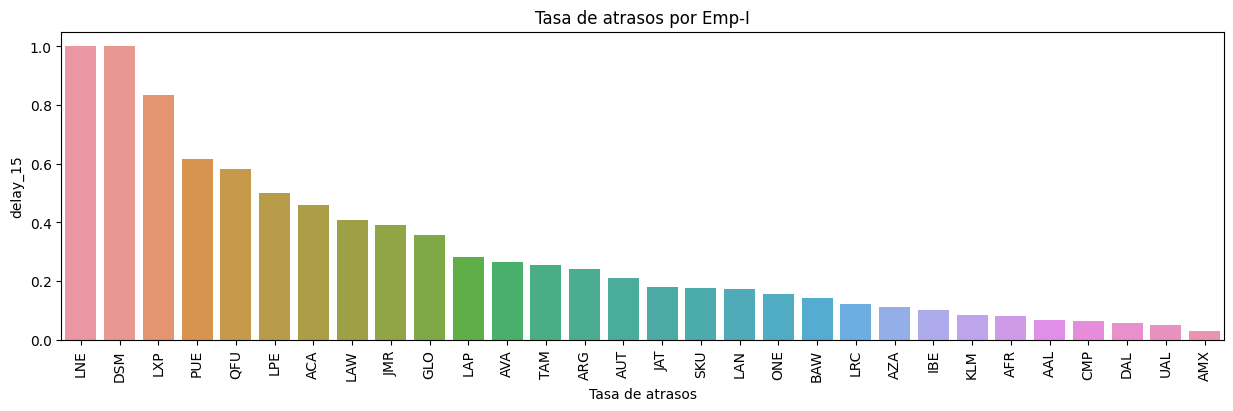

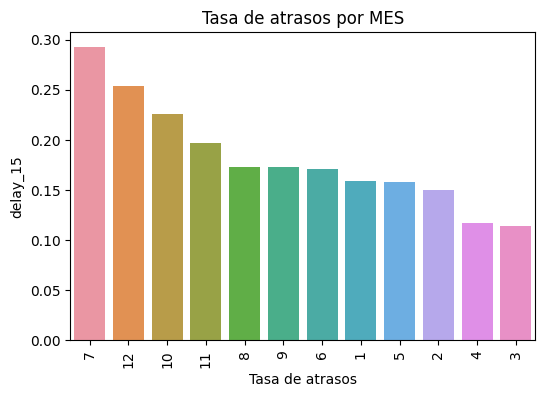

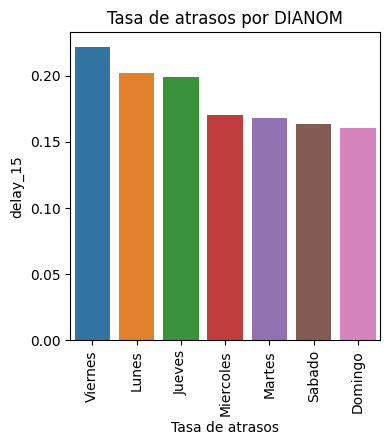

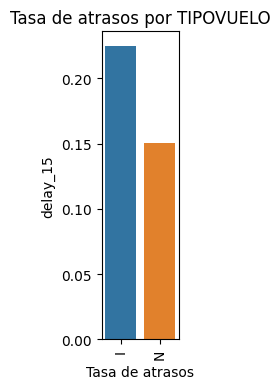

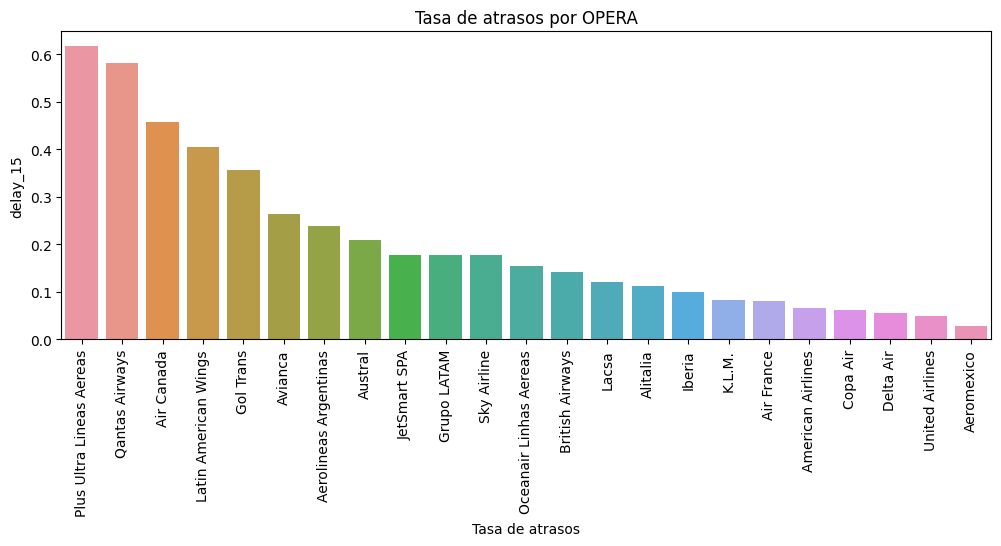

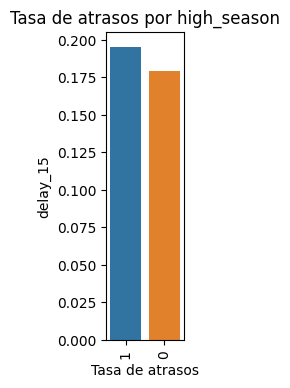

In [16]:
#Distribución de la tasa de atrasos para cada valor de las siguientes variables: 

cols = ['Des-I', 'Emp-I',  'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season']

for i in cols:
    sub_cols = [i, 'delay_15']
    df = new_data[sub_cols].groupby(i)['delay_15'].mean().reset_index().sort_values(by = 'delay_15', ascending= False)

    fig, ax = plt.subplots(figsize=( np.ceil((1/2)*len(df)), 4 ))
    sns.barplot(data=df,x= i ,y="delay_15", orient = 'v', ax=ax)
    plt.title(f'''Tasa de atrasos por {i}''')
    plt.xlabel(f'''Tasa de atrasos''')
    plt.xticks(rotation=90)
    plt.show()

## Análisis de la tasa de atrasos

In [17]:
# # Variable que tiene la tasa de atrasos en las ultimas 24 horas antes del vuelo programado
# new_data['delay_rate_24H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] > x['Fecha-I'] - pd.Timedelta(hours=24)) & 
#                                                                (new_data['Fecha-I'] < x['Fecha-I'])]['delay_15'].mean(), axis=1)

# # Variable que tiene la tasa de atrasos en las ultimas 12 horas antes del vuelo programado
# new_data['delay_rate_12H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] > x['Fecha-I'] - pd.Timedelta(hours=12)) & 
#                                                                (new_data['Fecha-I'] < x['Fecha-I'])]['delay_15'].mean(), axis=1)

# Variable que tiene la tasa de atrasos en las ultimas 6 horas antes del vuelo programado
new_data['delay_rate_6H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] > x['Fecha-I'] - pd.Timedelta(hours=6)) & 
                                                              (new_data['Fecha-I'] < x['Fecha-I'])]['delay_15'].mean(), axis=1)

# Variable que tiene la cantidad de vuelos programados cualquiera para las siguientes 24 horas
new_data['N_scheduled_flights_24H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] < x['Fecha-I'] + pd.Timedelta(hours=24)) & 
                                                                        (new_data['Fecha-I'] > x['Fecha-I'])]['Vlo-I'].count(), axis=1)

# Variable que tiene la cantidad de vuelos programados para el mismo lugar en las siguientes 24 horas
new_data['N_scheduled_flights_same_place_24H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] < x['Fecha-I'] + pd.Timedelta(hours=24)) & 
                                                                        (new_data['Fecha-I'] > x['Fecha-I']) & 
                                                                        (new_data['Des-I'] == x['Des-I'])]['Vlo-I'].count(), axis=1)
# Variable que tiene la cantidad de vuelos programados para con la misma aerolinea en las siguientes 24 horas
new_data['N_scheduled_flights_same_opera_24H'] = new_data.apply(lambda x: new_data[(new_data['Fecha-I'] < x['Fecha-I'] + pd.Timedelta(hours=24)) & 
                                                                        (new_data['Fecha-I'] > x['Fecha-I']) & 
                                                                        (new_data['OPERA'] == x['OPERA'])]['Vlo-I'].count(), axis=1)

## Distribución de las nuevas variables

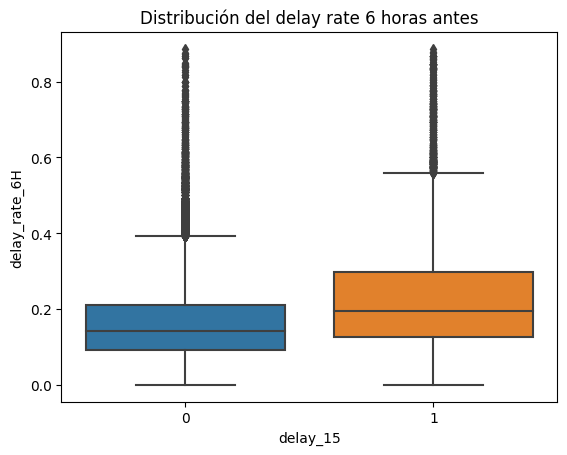

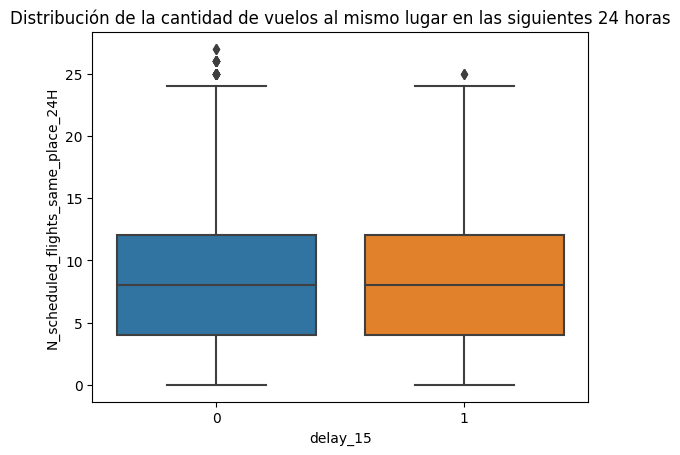

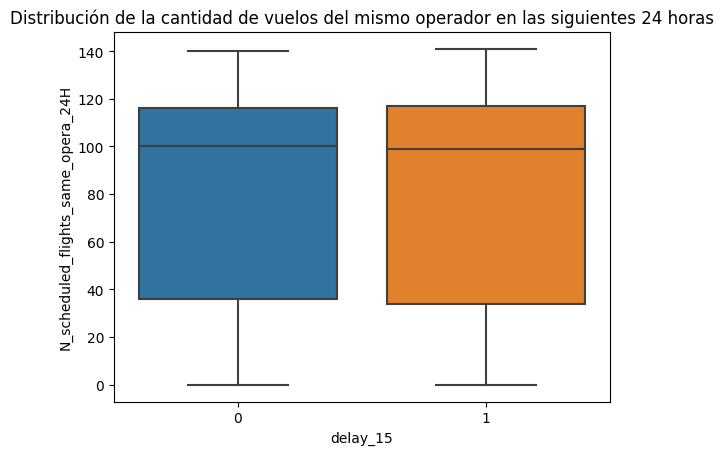

In [18]:
# Distribucion de las nuevas variables creadas
sub_cols = ['delay_rate_6H', 'delay_15']
df = new_data[sub_cols]

sns.boxplot(x='delay_15', y='delay_rate_6H', data=df)
plt.title("Distribución del delay rate 6 horas antes")
plt.show()

sub_cols = ['N_scheduled_flights_same_place_24H', 'delay_15']
df = new_data[sub_cols]

sns.boxplot(x='delay_15', y='N_scheduled_flights_same_place_24H', data=df)
plt.title("Distribución de la cantidad de vuelos al mismo lugar en las siguientes 24 horas")
plt.show()

sub_cols = ['N_scheduled_flights_same_opera_24H', 'delay_15']
df = new_data[sub_cols]

sns.boxplot(x='delay_15', y='N_scheduled_flights_same_opera_24H', data=df)
plt.title("Distribución de la cantidad de vuelos del mismo operador en las siguientes 24 horas")
plt.show()